# Lab 3
## Reinforcement Learning
Reinforcement Learning (RL) is a type of ML where an agent learns to make decisions by interacting with an environment. Through trial and error the agent observes the consequences of their action and adjusts it's behavior according to the reward it receives. Over time the agent learns to identify the actions that lead to the highest rewards and avoids penalties. 

It can be broadly categorized into two types 1. model based and 2. model free

Model based approaches are preferred when the environment and outcomes of action in the environment are predefined. Whereas, model free algorithms learn dynamically from actions and environment is partially obscured.



## OpenAI gymnasium
`gymnasimum` is a library that provides a collection of environments or tasks that can be used to test and develop reinforcement learning algorithms. It provides a set of interfaces and tools for interacting with the environments, such as observation spaces, action spaces, and rewards. It helps us:
1. Define the environment
2. Create an instance of the environment.
3. Define the agent's policy 

Repeat until performance is satisfactory:

4. Interact with the environment
5. update the agents policy based on the reward it receives.

## Gymnasium methods and workings
Gymnasium allows users to automatically load environments, pre-wrapped with importatnt wrappers through the function `gymnasium.make()`. We can also make custom environments using `gymnasium.register()`.
### `gymnasium.make()`:
This lets us create environmets previously registered. We can examine all available environments using `gym.envs.registry.keys()`


In [112]:
import gymnasium as gym
for env in gym.envs.registry.keys():
    print(env)

CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
phys2d/CartPole-v0
phys2d/CartPole-v1
phys2d/Pendulum-v0
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v2
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
tabular/Blackjack-v0
tabular/CliffWalking-v0
Reacher-v2
Reacher-v4
Pusher-v2
Pusher-v4
InvertedPendulum-v2
InvertedPendulum-v4
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
Hopper-v2
Hopper-v3
Hopper-v4
Swimmer-v2
Swimmer-v3
Swimmer-v4
Walker2d-v2
Walker2d-v3
Walker2d-v4
Ant-v2
Ant-v3
Ant-v4
Humanoid-v2
Humanoid-v3
Humanoid-v4
HumanoidStandup-v2
HumanoidStandup-v4
GymV21Environment-v0
GymV26Environment-v0


some notable parameters are :
### Parameters:
- **id** a string that specifies the environment.
- **max_episode_step** used to override the maximum length of an episode
### Parameters specific to `FrozenLake-v1`:
- **desc**: by default it is set to `None`. A map in the form of a string array with frozen blocks as F, starting block as S, holes as H, and goal as G. can be passed. This is used to set custom maps.
- **map_name**: A string that can be used to specify what built in map is used two available maps are "4x4" and "8x8". 
- **is_slippery**: setting it to `False` means the actions are deterministic. While `True` means they are stochastic.
- **render_mode**: Either "human", "ansi" or "rgb_array". Human displays the game in pygame. "rgb_array" is used to draw the map with game textures while "ansi" gives us the map in an ANSI string array.
- **render_fps**: used to set the fps of the simulation.

Let us now create a `FrozenLake-v1` environment and find out its specifications.

In [113]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array")
print(env.spec)


EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'map_name': '4x4', 'desc': None, 'is_slippery': True, 'render_mode': 'rgb_array'}, namespace=None, name='FrozenLake', version=1, additional_wrappers=(), vector_entry_point=None)


## `gymnasium.Env`
The main class of gymnasium is env. This encapsulates an environment with arbitrary dynamics into two simple functions `step()` and `reset()`. Thus letting multiple algorithms seamlessly interface with any RL enviromnent registered. 
The main API methods are:
### `step()`:
Runs one timestep of environment's dynamics using agents actions returning the next agent observation, the reward for taking that action, if the environment has terminated or truncated due to the latest action and information from the environment about the step, i.e. metrics, debug info.
### `reset()`:
Resets the environment to an initial internal state, returning an initial observation and info. This method generates a new starting state often with some randomness. This randomness is controlled with the `seed` parameter. `reset` should be used after initialization and after an episode has been terminated, to start the next episode.
### `render()`:
Compute the render frames as specified by `render_mode` during the initialization of the environment. Different render modes are 
- **human**: continous rendering in display for human consumption. Rendering automatically occurs during `step()` when this is set.
- **rgb_array**: Returns a single frame representing the current state of the environment. 
- **ansi**: Returns strings containg terminal style representation for each timestep. 
### `close()`:
 Closes the environment, important when external software is used, i.e. pygame for rendering, databases

Some Additional Attributes of the environment are
- **`action_space`**: Space object corresponding to valid actions,
- **`observation_space`**: Space object corresponding to valid observations. 
- **`reward_range`**:  A tuple corresponding to the minimum and maximum possible rewards for an agent over an episode. The default reward range is set to $(+\infty, -\infty)$
- **`spec`**:  An environment spec that contains the information used to initialize the environment from its initialization

We will go through demonstrations of these methods and attributes shortly. First let us get familiar with the environment and terminologies.

## `FrozenLake-v1`
`FrozenLake-v1` is an environment in the Toy Text collections of the `gymnasium` library. The goal here is to move from the start to a goal without falling into any holes by walking over a frozen lake. As ice is slippery the player may not always move in the right direction. 

With these preliminaries let us define the environment and the libary.

### Agent
An agent is an entity that interacts with the environment and learns to make decisions that maximize a goal or objective. Here the player character is the agent.

### Episode
A complete run of the environment from the initial state to the terminal state. Each episode is composed of a sequence of states actions and rewards.

### Environment 
The environment is and external system or context in which the agent operates. The environment provides feedback to the agent in form of rewards or punishments. The environment in this case is the environment we created earlier. Let us get more familiar with the environment attributes.

#### Observation Space/State Space:
Set of possible states that the agent can observe in the environment. Since we have initialized the environment map as a "4x4" map. We should have 16 possible positions for our agent and thus 16 states.

In [114]:
# we can see our observation space 
print(env.observation_space)
# it should be a discrete value of number of states
# or more directly
env.observation_space.n

Discrete(16)


16

### Action Space:
The set of possible actions that an agent can take in the environment. It should be the maximum number of actions an agent can perform at any given time. Here we can only move in 4 directions so it should give us 4. 

In [115]:
# we can see our action space 
print(env.action_space)
# it should be a discrete value of number of actions
# or more directly
env.action_space.n

Discrete(4)


4

### Reward Range:
This is just to see how the rewards are the reward function will be detailed later. We can see the reward range is within 0 and 1. As we only assign 1 when we get to the goal and don't assign rewards otherwise in this environmet

In [116]:
env.reward_range

(0, 1)

# FrozenLake as an MDP
## MDP
MDP or Markov Decision Process is a mathematical framework for decision making. It consists of a 4-tuple $(S,A,P,R)$:
1. $S$ -> Set of States. $s\in S$
2. $A$ -> Set of Actions. $a \in A$
3. $P$ -> Transition function $P(s'|s,a)$
	- probability $P(s'|s,a)$ that $a$ from $s$ leads to $s'$
	- Also called the dynamics model or the model of the environment
4. $R$ -> Reward function $R(s,a,s')$ or $R(s)$

Typically we don't know the true functions $P\ or\ R$. These are the situations we use model free RL and when these are known, model based RL is preferable (given the environment is static)

## `FrozenLake-v1` MDP:
### Set of states $S$
set of states are ennumerated from 0 to max number of observations. Where the player is in the corresponding tile.

In [117]:
states = []
for obs in range(env.observation_space.n):
    states.append(obs)
print(states)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


### Set of actions $A$ 
Set of actions available at any point is a map of the directions. (We're reversing it for further usability)

In [118]:
action_map = {0: "LEFT", 1: "DOWN", 2: "RIGHT", 3: "UP"}

### Transition function $P$
P is provided as a look up table this is however different for the stochastic and the deterministic case. Each tuple in P represents in order 
`(probability of moving to next state, next state, reward, is terminal case)`

In [119]:
# stochastic case
for state in states:
    for action in range(env.action_space.n):
        print(f"for state -> {state} and action -> {action_map[action]}")
        print(env.get_wrapper_attr('P')[state][action])

for state -> 0 and action -> LEFT
[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)]
for state -> 0 and action -> DOWN
[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False)]
for state -> 0 and action -> RIGHT
[(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]
for state -> 0 and action -> UP
[(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False)]
for state -> 1 and action -> LEFT
[(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)]
for state -> 1 and action -> DOWN
[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False)]
for state -> 1 and action -> RIGHT
[(0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False), (0.333333333333333

We can see that in the stochastic case an action taken can transition to at most 3 states. 

In [120]:
# deterministic case
det_env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")
for state in states:
    for action in range(det_env.action_space.n):
        print(f"for state -> {state} and action -> {action_map[action]}")
        print(det_env.get_wrapper_attr('P')[state][action])

for state -> 0 and action -> LEFT
[(1.0, 0, 0.0, False)]
for state -> 0 and action -> DOWN
[(1.0, 4, 0.0, False)]
for state -> 0 and action -> RIGHT
[(1.0, 1, 0.0, False)]
for state -> 0 and action -> UP
[(1.0, 0, 0.0, False)]
for state -> 1 and action -> LEFT
[(1.0, 0, 0.0, False)]
for state -> 1 and action -> DOWN
[(1.0, 5, 0.0, True)]
for state -> 1 and action -> RIGHT
[(1.0, 2, 0.0, False)]
for state -> 1 and action -> UP
[(1.0, 1, 0.0, False)]
for state -> 2 and action -> LEFT
[(1.0, 1, 0.0, False)]
for state -> 2 and action -> DOWN
[(1.0, 6, 0.0, False)]
for state -> 2 and action -> RIGHT
[(1.0, 3, 0.0, False)]
for state -> 2 and action -> UP
[(1.0, 2, 0.0, False)]
for state -> 3 and action -> LEFT
[(1.0, 2, 0.0, False)]
for state -> 3 and action -> DOWN
[(1.0, 7, 0.0, True)]
for state -> 3 and action -> RIGHT
[(1.0, 3, 0.0, False)]
for state -> 3 and action -> UP
[(1.0, 3, 0.0, False)]
for state -> 4 and action -> LEFT
[(1.0, 4, 0.0, False)]
for state -> 4 and action -> DOWN
[(1

When the transitions are deterministic an action directly maps to a next state. 

### Reward
Reward is defined simply as 1 if the transition leads to the final state else it is zero. by examining the transition tables we can see this.

# Value Iteration: 
Value iteration is a dynamic programming algorithm used to find the optimal value function for a Markov decision process (MDP). It works by iteratively updating the value of each state based on the Bellman equation until convergence. It may require a large number of iterations to converge, especially for large state spaces. It requires storing values for all states, which can be memory-intensive for large state spaces. Value iteration is typically used for discrete state spaces and may not be directly applicable to continuous state spaces without discretization. We also need full knowledge of the environment to make value iteration work. 

The Bellman equation states that the value of a state is equal to the maximum expected sum of rewards that can be obtained from that state onward.That is it essentially states that, an agent’s utility depends not only on its immediate rewards but also on its future discounted Bellman equation rewards. $$U(s)=R(s)+\gamma \underset{a}{max} \sum_{s'} P(s'|s,a)U(s')$$

The Bellman update equation is applied during each iteration of value iteration to update the value of each state based on the values of neighboring states and the rewards associated with transitioning between them. We start from arbitrary numbers and iteratively improve them using the equation $$u^{t+1} \leftarrow r(s) + \gamma\underset{a}{max} \sum_{s'} P(s'|s,a)u^t(s')$$

The Bellman equation is simple and easy to understand. It is guranteed to converge for optimal value function, and policy for finite MDPs. 


The error thershold $\epsilon$ is an important parameter set by the user dictating how precise we want our final estimate to be. A smaller $\epsilon$ means you wait longer but get higher accuracy. 

The discount factor $\gamma$ controls how much weight is givent to future rewards compared to immediate rewards. It has a crucial relationship with $\epsilon$. Higher $\gamma$ means we strongly consider future rewards, slowing down convergence, consequently a smaller epsilon in needed to compensate in accuracy. When $\gamma$ is lower than 1 we prioritize immediate rewards. Convergence may be faster, as distant state values have less influence. 

Stopping criteria is when the maximum change is lower than a threshold $\epsilon(1-\gamma)/\gamma$. But this provides no gurantees of optimal values it just states further iterations are unlikely to yeild better results. It may get stuck in a local optima.

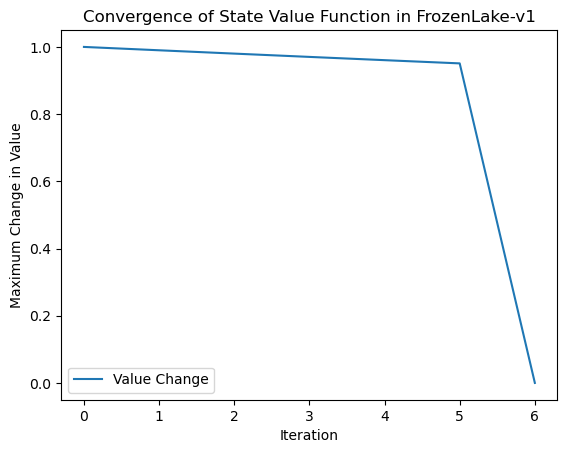

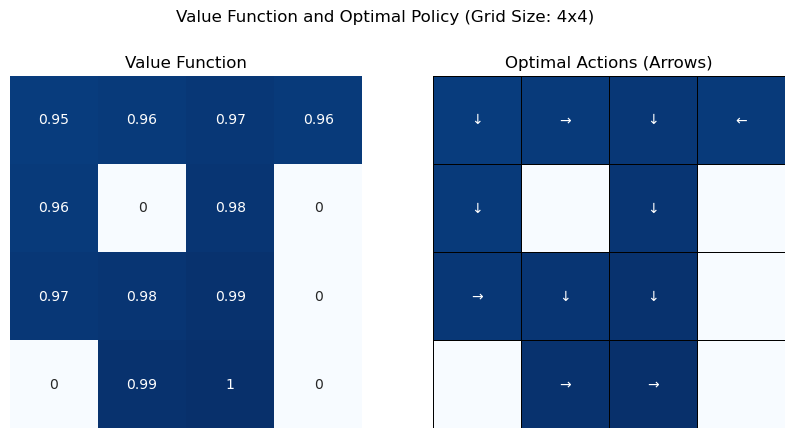

In [121]:
import value_iteration as vi
# deterministic
observation, info = det_env.reset()
det_optimal_V, det_iterations, det_change_per_it, det_policy = vi.value_iteration(det_env)
vi.plot_value_function(det_iterations, det_change_per_it)
vi.grid_print(det_optimal_V, det_policy, 4)


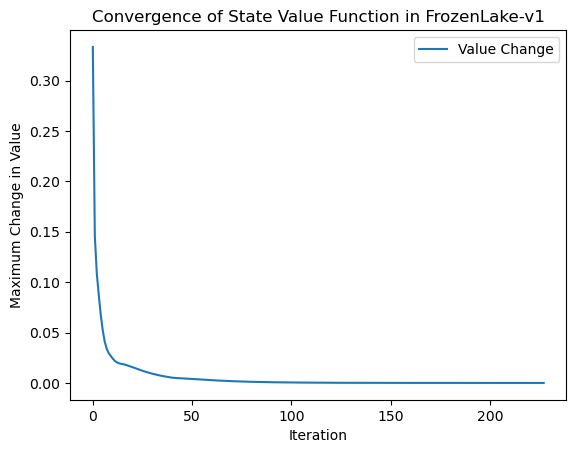

[0.54201404 0.49878743 0.47067727 0.45683193 0.5584404  0.
 0.35834012 0.         0.59179013 0.64307363 0.61520214 0.
 0.         0.74171617 0.86283528 0.        ]


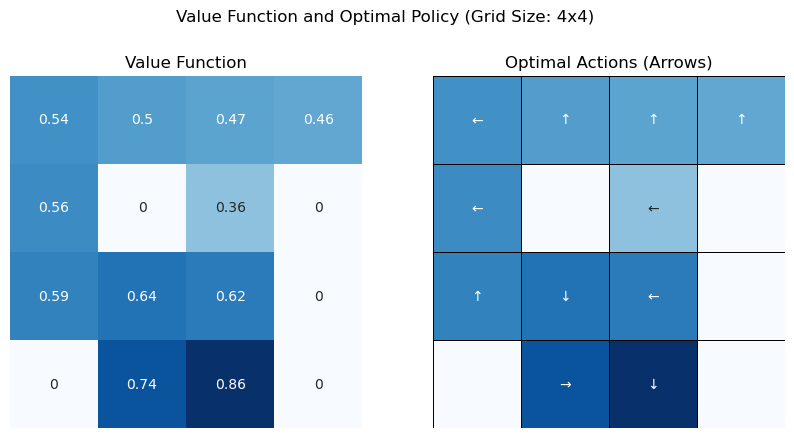

In [122]:
# stochastic
observation, info = env.reset()
sto_optimal_V, sto_iterations, sto_change_per_it, sto_policy = vi.value_iteration(env)
vi.plot_value_function(sto_iterations, sto_change_per_it)
print(sto_optimal_V)
vi.grid_print(sto_optimal_V, sto_policy, 4)

Now we shall run the deterministic and the stochastic policy.

In [123]:
# Deterministic
det_rewards_collected = 0
for i in range(5):
    det_rewards_collected += vi.run_policy(False, det_policy)
print(f"Rewards collected -> {det_rewards_collected}")

Rewards collected -> 5


In [13]:
# stochastic
sto_rewards_collected = 0
for i in range(5):
    sto_rewards_collected += vi.run_policy(True, sto_policy)
print(f"Rewards collected -> {sto_rewards_collected}")

Rewards collected -> 4


# Q-Learning:
Q-learning is a model-free reinforcement learning algorithm used to find the optimal policy for a Markov decision process (MDP). It learns by interacting with the environment and updating Q-values, which represent the expected cumulative rewards of taking a particular action in a given state.

The algorithm starts with an arbitrary initialization of Q-values and iteratively improves them based on the rewards received from the environment. Unlike value iteration, Q-learning does not require knowledge of the transition probabilities of the environment, making it applicable in cases where the dynamics of the environment are unknown or complex.

The Q-learning update equation is:

$$Q(s, a) \leftarrow Q(s, a) + \alpha \cdot \left( r + \gamma \cdot \max_{a'} Q(s', a') - Q(s, a) \right)$$

where:
- $Q(s, a)$ is the Q-value for taking action $a$ in state $s$,
- $\alpha$ is the learning rate, controlling the impact of new information on the Q-values,
- $r$ is the reward received after taking action $a$ in state $s$,
- $\gamma$ is the discount factor, determining the importance of future rewards,
- $s'$ is the next state after taking action $a$,
- $\max_{a'} Q(s', a')$ represents the maximum Q-value achievable from state $s'$, and
- $(r + \gamma \cdot \max_{a'} Q(s', a')) - Q(s, a)$ is the temporal difference error, representing the discrepancy between the predicted and actual Q-values.

### Characteristics
1. **Model-free**: Q-learning does not require knowledge of the environment dynamics, making it suitable for a wide range of applications.
2. **Generalization**: Q-learning can learn optimal policies even in complex and stochastic environments.
3. **Exploration-exploitation trade-off**: Q-learning requires a balance between exploration of new actions and exploitation of known actions.
4. **Convergence**: While Q-learning is theoretically guaranteed to converge under certain conditions, convergence may be slow or suboptimal in practice, especially in large state spaces.
5. **Sensitivity to hyperparameters**: The performance of Q-learning can be sensitive to the choice of hyperparameters such as the learning rate and discount factor. Fine-tuning these hyperparameters may be necessary for optimal performance.

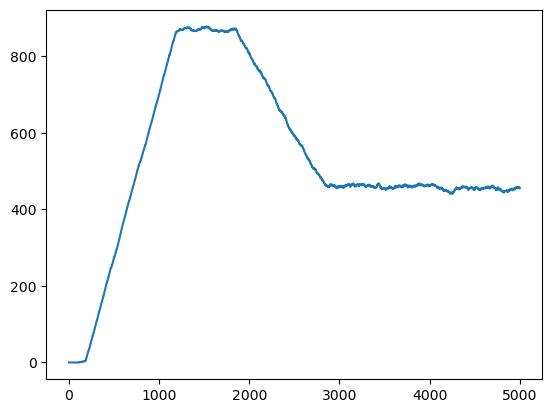

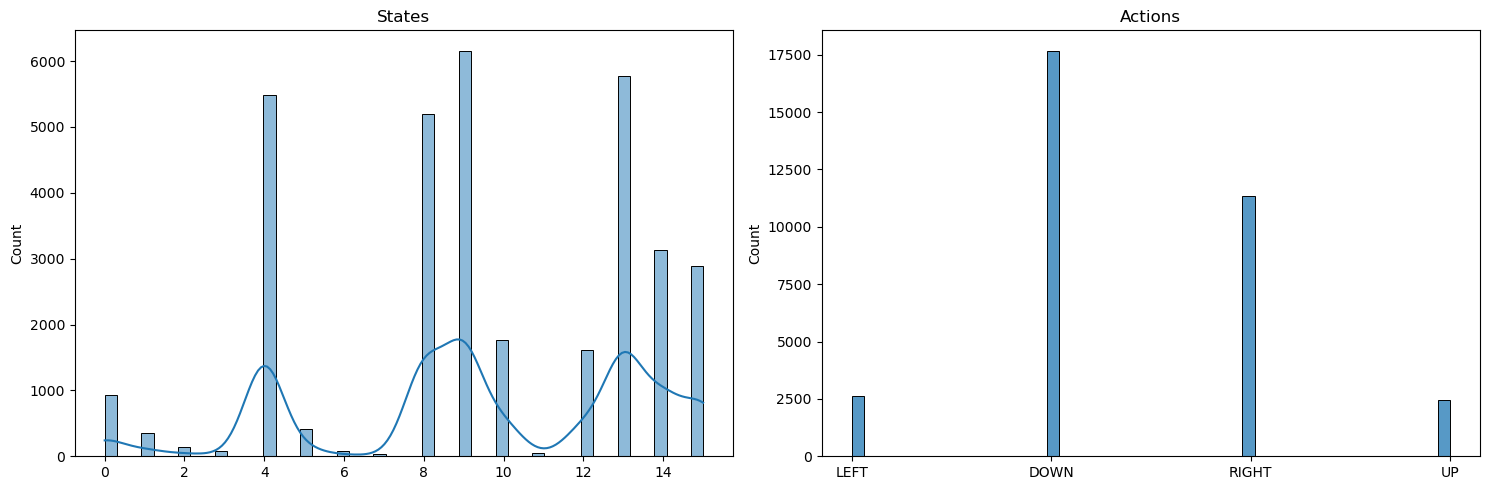

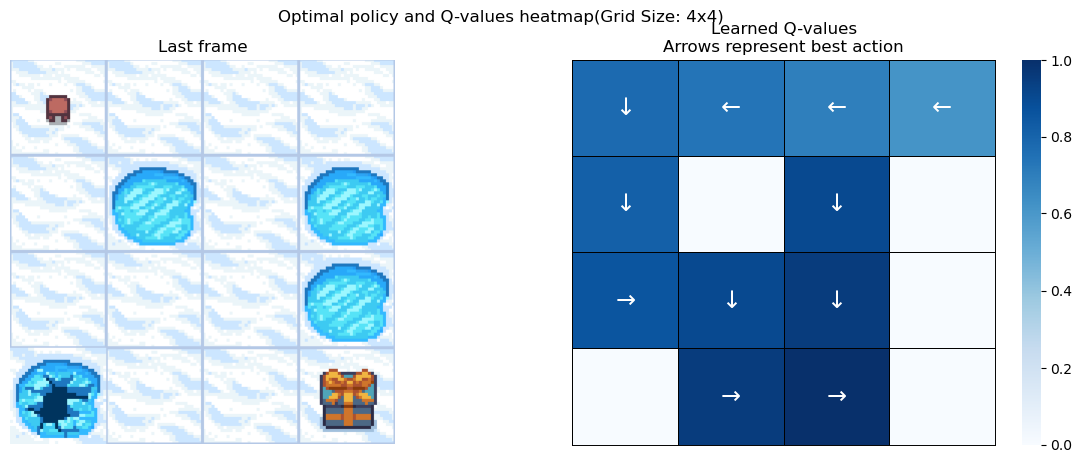

In [124]:
import qlearning as ql
# deterministic 
detq_Q_table, detq_rewards_per_episode, detq_states, detq_actions = ql.q_learning(det_env)
ql.plot_cum_rewards(rewards_per_episode=detq_rewards_per_episode, episodes=5000)
ql.plot_states_actions_distribution(detq_states, detq_actions, map_size=4)
ql.plot_q_values_map(detq_Q_table, det_env, 4)

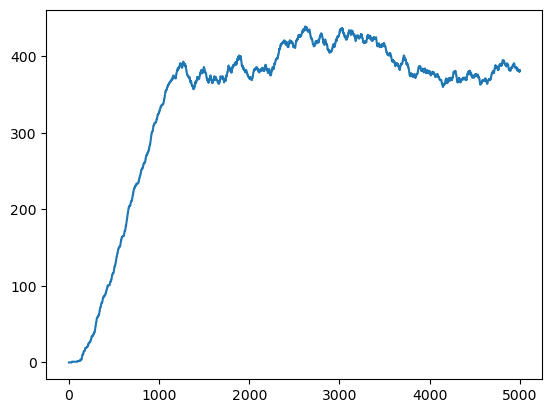

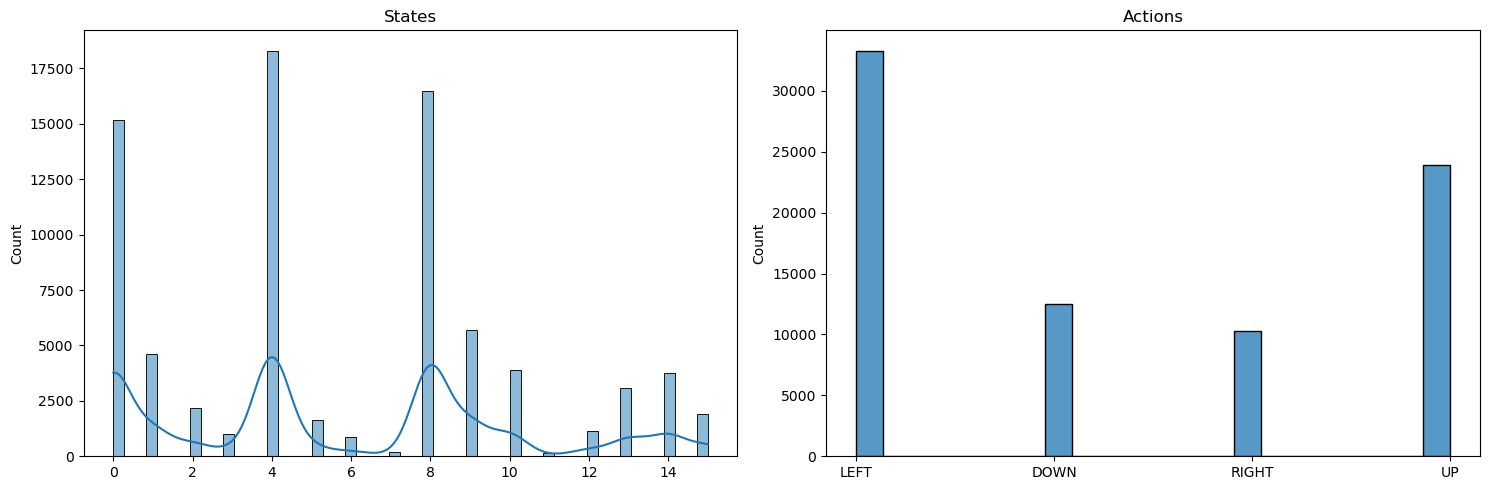

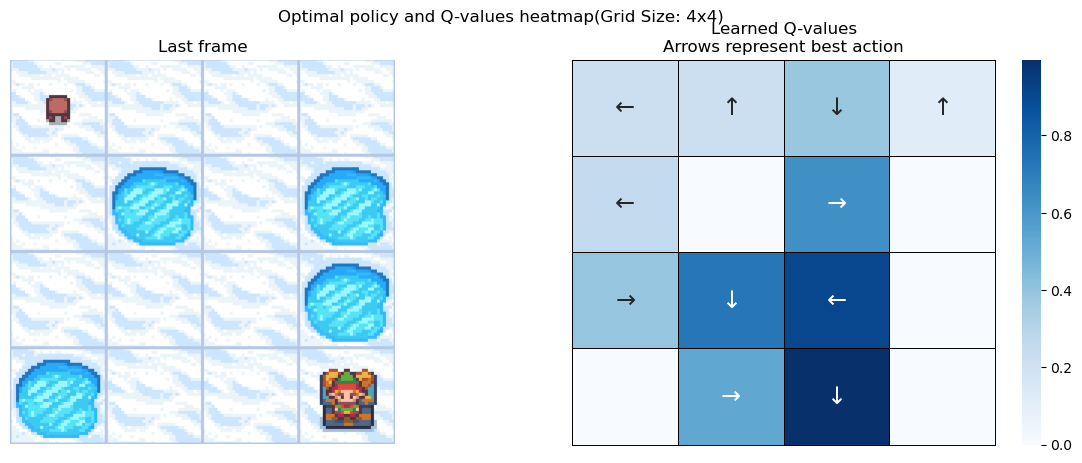

In [125]:
# stochastic
stoq_Q_table, stoq_rewards_per_episode, stoq_states, stoq_actions = ql.q_learning(env)
ql.plot_cum_rewards(rewards_per_episode=stoq_rewards_per_episode, episodes=5000)
ql.plot_states_actions_distribution(stoq_states, stoq_actions, map_size=4)
ql.plot_q_values_map(stoq_Q_table, env, 4)

Now we run the policy given to us by qlearning on our example graph thus far. 

In [16]:
# Deterministic
detq_rewards_collected = 0
for i in range(5):
    detq_rewards_collected += ql.run_policy(detq_Q_table, False)
print(f"Rewards collected -> {detq_rewards_collected}")

Rewards collected -> 5


In [17]:
# stochastic
stoq_rewards_collected = 0
for i in range(5):
    stoq_rewards_collected += ql.run_policy(stoq_Q_table, True)
print(f"Rewards collected -> {stoq_rewards_collected}")

Rewards collected -> 0


# Performance evaluation of the two Policies, Value Iteration vs Q learning
Let us plot the policies side by side:

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def get_directions(optimal_V, policy, reshapeDim):
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    best_actions = optimal_V.reshape(reshapeDim, reshapeDim)
    directions_table = np.empty(best_actions.flatten().shape, dtype=str)
    for idx, val in enumerate(best_actions.flatten()):
        if best_actions.flatten()[idx] > 0:
            directions_table[idx] = directions[policy[idx]]
    directions_table = directions_table.reshape(reshapeDim, reshapeDim)
    return best_actions, directions_table
def qtable_directions_map(qtable, map_size):
    qtable_val_max = qtable.max(axis=1).reshape(map_size, map_size)
    qtable_best_action = np.argmax(qtable, axis=1).reshape(map_size, map_size)
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    qtable_directions = np.empty(qtable_best_action.flatten().shape, dtype=str)
    eps = np.finfo(float).eps  # Minimum float number on the machine
    for idx, val in enumerate(qtable_best_action.flatten()):
        if qtable_val_max.flatten()[idx] > eps:
            qtable_directions[idx] = directions[val]
    qtable_directions = qtable_directions.reshape(map_size, map_size)
    return qtable_val_max, qtable_directions
def grid_print(optimal_V, vi_policy, qtable, reshapeDim, det=True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    best_actions, direction_table = get_directions(optimal_V, vi_policy, reshapeDim)
    sns.heatmap(best_actions, ax=ax1, annot=direction_table, 
                square=True, cbar=False, fmt="", cmap='Blues', 
                xticklabels=False, yticklabels=False, 
                linewidths=0.7,linecolor="black",)
    
    ax1.set_title("Value Iteration Best Policy")
    qtable_val_max, qtable_directions = qtable_directions_map(qtable, reshapeDim)
    ax2.set_title("Q-Learning Best Policy")
    sns.heatmap(
        qtable_val_max,
        annot=qtable_directions,
        fmt="",
        ax=ax2,
        cmap=sns.color_palette("Blues", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
        xticklabels=[],
        yticklabels=[],
        annot_kws={"fontsize": "xx-large"},
    )
    if det:
        fig.suptitle(f"Optimal Policy Comparison in Deterministic Case (Grid Size: {reshapeDim}x{reshapeDim})")
    else: 
        fig.suptitle(f"Optimal Policy Comparison in Stochastic Case (Grid Size: {reshapeDim}x{reshapeDim})")
    plt.show()

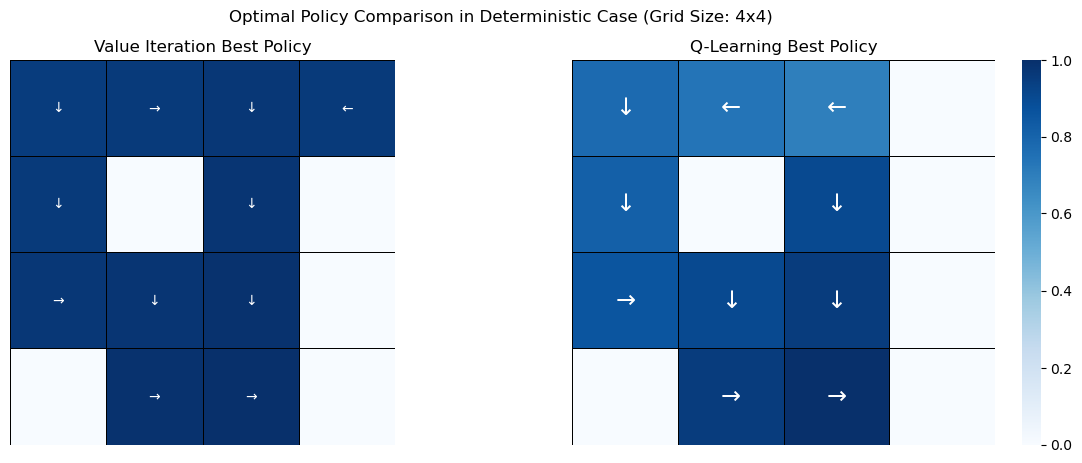

In [19]:
grid_print(det_optimal_V, det_policy, detq_Q_table, 4)

# Analysis of the policies
## Deterministic
If we look at the deterministic case the Q learning policy outright fails to explore some frozen tiles. This is because the algorithm has no prior knowledge about action outcomes and must learn them by taking actions. Whereas the Value Iteration policy is complete from any possible position. If we keep the map same but change the starting position the Value iteration policy will be complete but for the starting states ${3, 6}$ the policy given by Q-Learning won't work good. This can be remedied by increasing the exploration in Q-Learning by setting higher values of $\epsilon$

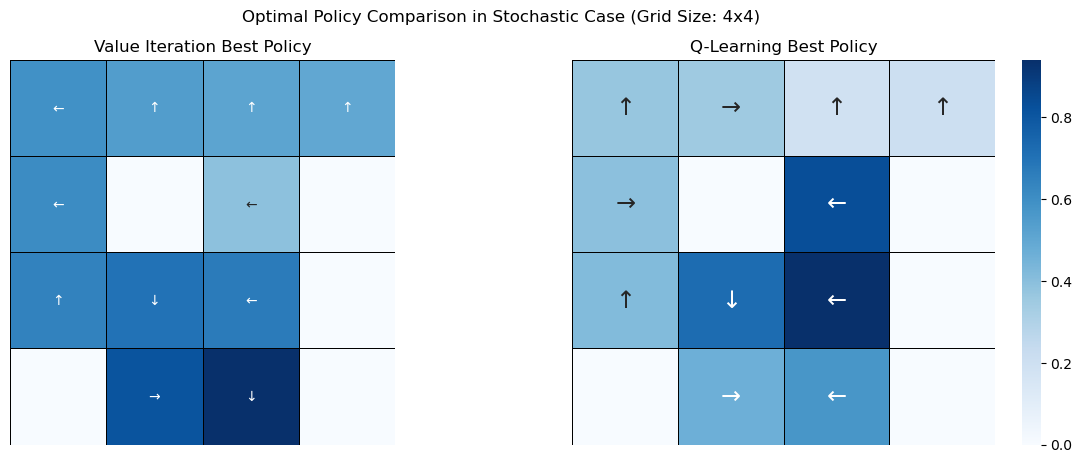

In [20]:
grid_print(sto_optimal_V, sto_policy, stoq_Q_table, 4, det=False)

## Stochastic
If we look at the stochastic case, at first the policies might look suboptimal. But let's examine the claim a bit.

In [21]:
print(f"outcomes of up from state 2 {env.get_wrapper_attr('P')[2][3]}")
print(f"outcomes of down from state 2 {env.get_wrapper_attr('P')[2][1]}")
print(f"outcomes of left from state 2 {env.get_wrapper_attr('P')[2][0]}")

outcomes of up from state 2 [(0.3333333333333333, 3, 0.0, False), (0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False)]
outcomes of down from state 2 [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 6, 0.0, False), (0.3333333333333333, 3, 0.0, False)]
outcomes of left from state 2 [(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 6, 0.0, False)]


#### learning rate -> 0.1
If we examine the results we see that upon going up or left from state 2 we hit against the wall and stay in state 2 for one case. This reduces uncertainty, thus this strategy exploits the stochastic nature of the environment to it's advantage. The Value iteration answer is more acceptable as it stops the player from ever going to state 6 from state 2 as state 6 is very precarious and puts the player in a situation where they are quite likely to fall in a hole. 

##### learning rate -> 0.8
A high learning rate fixes the policy as seen above. Both are now similar.

In conclusion, due to having better information the value iteration policy is superior.

# Benchmarks
Finally we benchmark our data to see how the algorithms perform over specific areas. 

In [22]:
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
prob_frozen_tile = 0.9
seed = 69
map_sizes = [4, 6, 9]
maps = {}
for map_size in map_sizes:
    pmap = generate_random_map(size=map_size, p=prob_frozen_tile, seed=69)
    maps[map_size]=pmap

RUNS = 5
training_episodes = [100, 500, 1000, 2500, 5000, 10000]

training_times = {
    'Value Iteration': {
        'det': {},
        'sto': {},
    },
    'Q-Learning': {
        'det': {},
        'sto': {},
    }
}
policies = {
    'Value Iteration': {
        'det': {},
        'sto': {},
    },
    'Q-Learning': {
        'det': {},
        'sto': {},
    }
}
Rewards_collected = {
    'Value Iteration': {
        'det': {},
        'sto': {},
    },
    'Q-Learning': {
        'det': {},
        'sto': {},
    }
}


In [33]:
# Training
import time
for m in map_sizes:
    mp = maps[m]
    for algorithm in training_times.keys():
        if algorithm == 'Value Iteration':
            for envType in training_times[algorithm].keys():
                slippy = False if envType == 'det' else True
                startTime = time.time()
                det_env = gym.make(
                        "FrozenLake-v1",
                        is_slippery=slippy,
                        desc=mp,
                        render_mode="rgb_array"
                        )
                observation, info = det_env.reset()
                det_optimal_V, det_iterations, det_change_per_it, det_policy = vi.value_iteration(det_env)
                endTime=time.time()
                policies[algorithm][envType][m] = det_policy
                training_times[algorithm][envType][m] = startTime - endTime
        else:
            for envType in training_times[algorithm].keys():
                slippy = False if envType == 'det' else True
                training_times[algorithm][envType][m] = {}
                policies[algorithm][envType][m] = {}
                for ep in training_episodes:
                    startTime = time.time()
                    env = gym.make(
                        "FrozenLake-v1", 
                        is_slippery=slippy,
                        render_mode="rgb_array",
                        desc=mp)
                    observation, info = det_env.reset()
                    stoq_Q_table, stoq_rewards_per_episode, stoq_states, stoq_actions = ql.q_learning(env, episodes=ep)
                    endTime=time.time()
                    training_times[algorithm][envType][m][ep] = endTime - startTime
                    policies[algorithm][envType][m][ep] = stoq_Q_table




In [38]:
# inference
for m in map_sizes:
    mp = maps[m]
    for algorithm in training_times.keys():
        if algorithm == 'Value Iteration':
            for envType in training_times['Value Iteration'].keys():
                if envType == 'det':
                    slippy = False
                else:
                    slippy = True
                policy = policies[algorithm][envType][m]
                rewards_collected = 0
                for i in range(RUNS):
                    rewards_collected += vi.run_policy(slippy, policy, desc=mp)
                Rewards_collected[algorithm][envType][m]=rewards_collected
        else:
            for envType in training_times['Q-Learning'].keys():
                if envType == 'det':
                    slippy = False
                else:
                    slippy = True
                Rewards_collected[algorithm][envType][m] = {}
                for ep in training_episodes:
                    policy = policies[algorithm][envType][m][ep]
                    rewards_collected = 0
                    for i in range(RUNS):
                        rewards_collected += ql.run_policy(policy, slippy, desc=mp)
                    Rewards_collected[algorithm][envType][m][ep]=rewards_collected

In [49]:
print(Rewards_collected)

{'Value Iteration': {'det': {4: 5, 6: 5, 9: 5}, 'sto': {4: 5, 6: 5, 9: 3}}, 'Q-Learning': {'det': {4: {100: 5, 500: 5, 1000: 5, 2500: 5, 5000: 5, 10000: 5}, 6: {100: 0, 500: 5, 1000: 5, 2500: 5, 5000: 5, 10000: 5}, 9: {100: 0, 500: 5, 1000: 5, 2500: 5, 5000: 5, 10000: 5}}, 'sto': {4: {100: 5, 500: 5, 1000: 5, 2500: 5, 5000: 5, 10000: 5}, 6: {100: 0, 500: 3, 1000: 0, 2500: 2, 5000: 0, 10000: 1}, 9: {100: 0, 500: 4, 1000: 2, 2500: 2, 5000: 1, 10000: 3}}}}


# Results

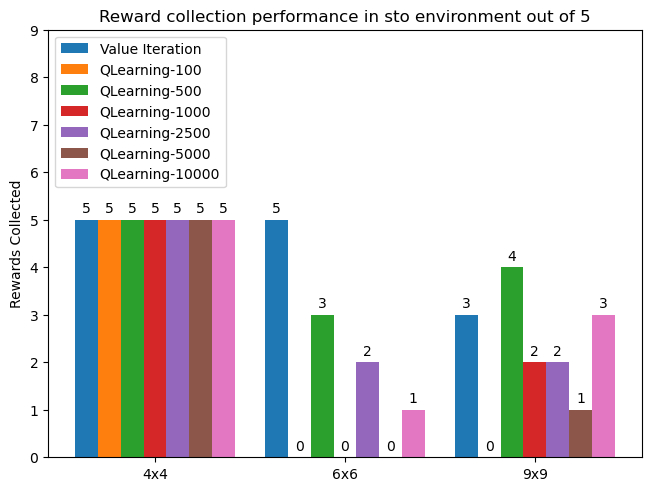

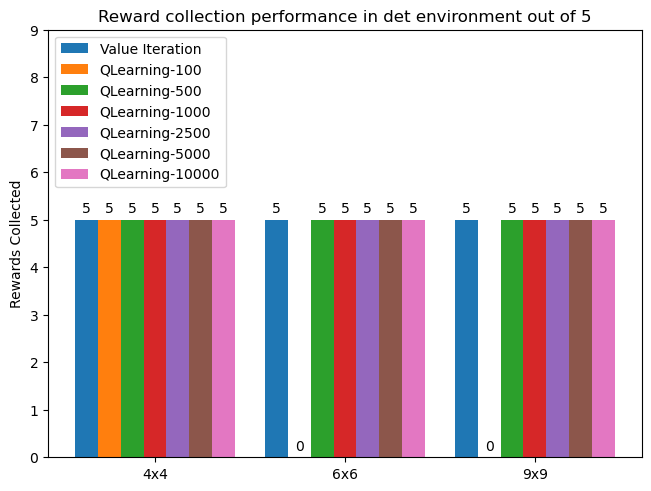

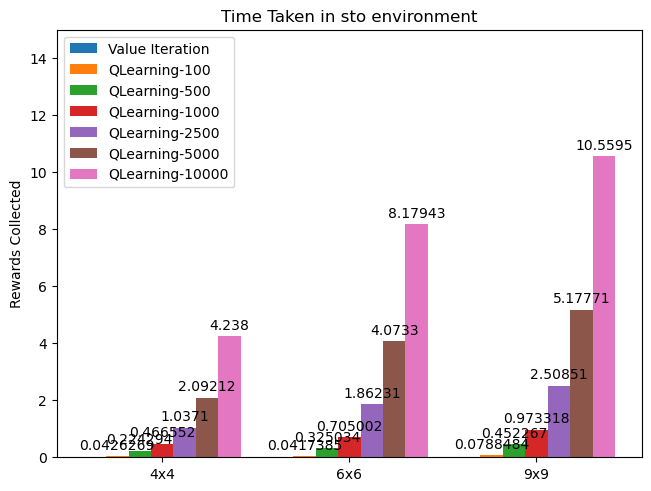

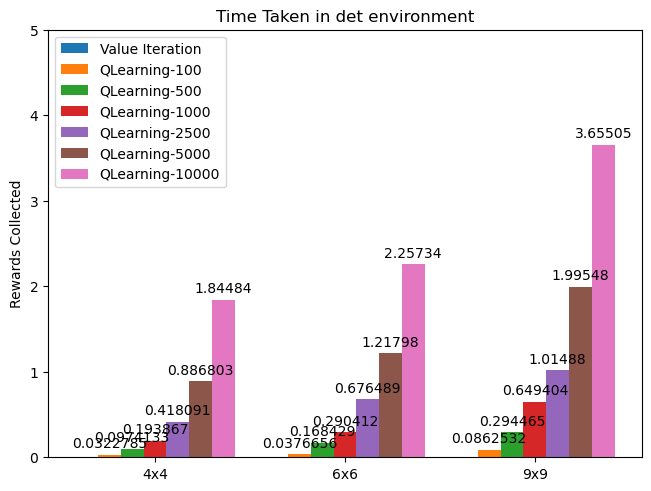

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plot_rewards(rewards_dict, map_sizes, episodes, envType):
    N = len(map_sizes)
    x = np.array(range(N))
    width = 0.12
    multiplier = 0
    
    maps = (f"{mp}x{mp}" for mp in map_sizes)

    rewards_list = {}
    for algo in rewards_dict.keys():
        if algo == 'Value Iteration':
            lst = []
            for m in map_sizes:
                lst.append(rewards_dict[algo][envType][m])
            rewards_list['Value Iteration'] = lst
        else:
            for e_len in episodes:
                lst = []
                for m in map_sizes:
                    # print(algo, envType, m, e_len)
                    lst.append(rewards_dict[algo][envType][m][e_len])
                rewards_list[f'QLearning-{e_len}'] = lst
    fig, ax = plt.subplots(layout="constrained")
    for attribute, measurement in rewards_list.items():
        offset = width * multiplier
        xi = [i + offset for i in x]
        rects = ax.bar(xi, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier+=1
    ax.set_ylabel('Rewards Collected')
    ax.set_xticks(x+width*3, maps)
    ax.legend(loc='upper left')
    ax.set_ylim(0, 9) 
    ax.set_title(f'Reward collection performance in {envType} environment out of 5')
    plt.show()   

def plot_time(training_times, map_sizes, episodes, envType):
    N = len(map_sizes)
    x = np.array(range(N))
    width = 0.12
    multiplier = 0
    
    maps = (f"{mp}x{mp}" for mp in map_sizes)

    rewards_list = {}
    for algo in training_times.keys():
        if algo == 'Value Iteration':
            lst = []
            for m in map_sizes:
                lst.append(training_times[algo][envType][m])
            rewards_list['Value Iteration'] = lst
        else:
            for e_len in episodes:
                lst = []
                for m in map_sizes:
                    # print(algo, envType, m, e_len)
                    lst.append(training_times[algo][envType][m][e_len])
                rewards_list[f'QLearning-{e_len}'] = lst

    fig, ax = plt.subplots(layout="constrained")
    for attribute, measurement in rewards_list.items():
        offset = width * multiplier
        xi = [i + offset for i in x]
        rects = ax.bar(xi, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier+=1
    ax.set_ylabel('Rewards Collected')
    ax.set_xticks(x+width*3, maps)
    ax.legend(loc='upper left')
    mx = 15 if envType== 'sto' else 5
    ax.set_ylim(0, mx) 
    ax.set_title(f'Time Taken in {envType} environment')
    plt.show() 

plot_rewards(Rewards_collected, map_sizes, training_episodes, 'sto')
plot_rewards(Rewards_collected, map_sizes, training_episodes, 'det')
plot_time(training_times, map_sizes, training_episodes, 'sto')
plot_time(training_times, map_sizes, training_episodes, 'det')

# References
1. https://gymnasium.farama.org/api/wrappers/#gymnasium.Wrapper.unwrapped
2. https://gymnasium.farama.org/api/env/#gymnasium.Env
3. https://gymnasium.farama.org/api/registry/#gymnasium.make
4. https://gymnasium.farama.org/environments/toy_text/frozen_lake/
5. https://gymnasium.farama.org/tutorials/training_agents/FrozenLake_tuto/
6. https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py